### CSI_7_CVP COURSEWORK TO TEST COMPUTER VISION KNOWLEDGE (PART I, 40%)

## **1**

Throughtout this test you will use the image of the LSBU building and logo. but before this, import all necessary libraries/packages:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
image_file = 'LSBU_image.jpg'
im = cv2.imread(image_file)

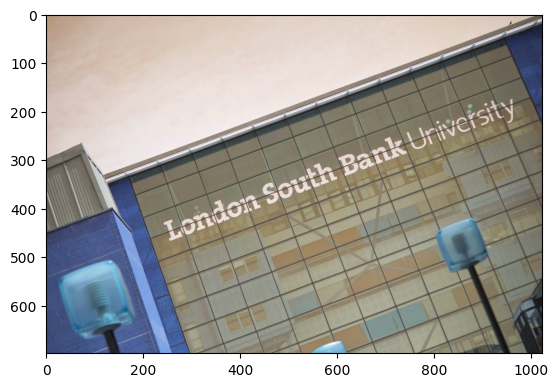

In [ ]:
# show the image
plt.imshow(im)

**what is wrong with this image and how would you correct it?**

**Answer:** Basically image is not the right position. So I've to scale its position horizontally.

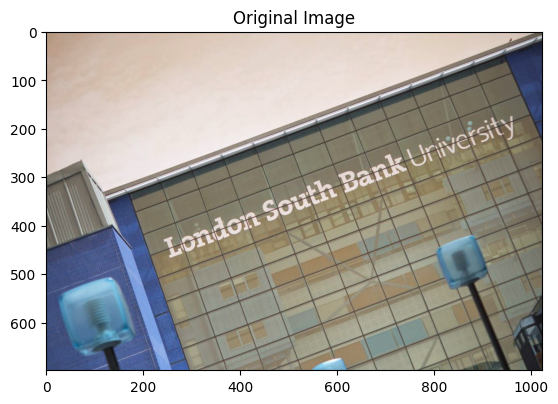

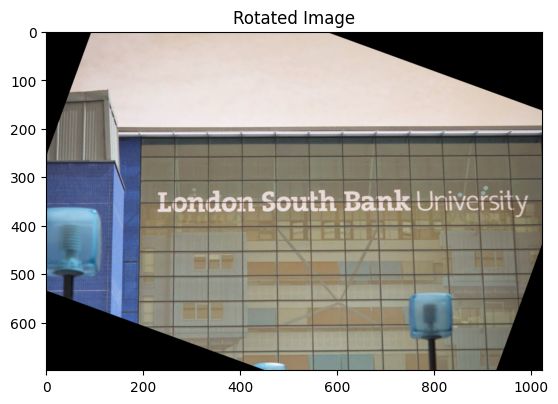

In [ ]:
# Any quick solution you would like to show?
# Import necessary libraries/packages
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read the image
input_image = 'LSBU_image.jpg'
image = cv2.imread(input_image)

# Display the image
plt.imshow(image)
plt.title('Original Image')
plt.show()

# 1. Answer the question about the image
# Your answer here

# 2. Rotate the image to straighten LSBU logo string
# Define the rotation matrix and apply rotation
center = (image.shape[1] // 2, image.shape[0] // 2)  # Center of the image
angle = -20  # Rotation angle
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()




## **2**

**Read or convert the above image to greyscale and display it in the cell below **

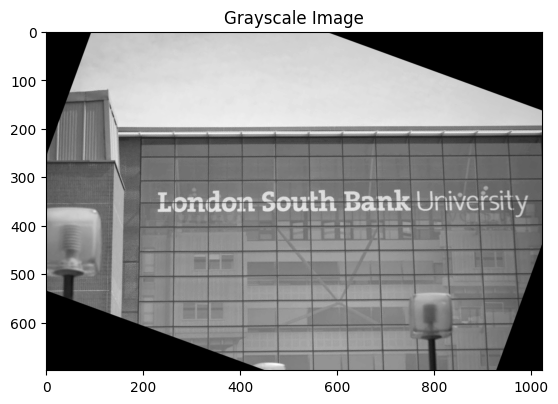

In [ ]:

# 3. Convert the image to grayscale and display it
gray_image = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

Now, rotate the image such that the LSBU logo string is in straight line.  You can use the functions below from the CVP library, or any other of your choice.  Mind you, there are undefined variables which you need to define.

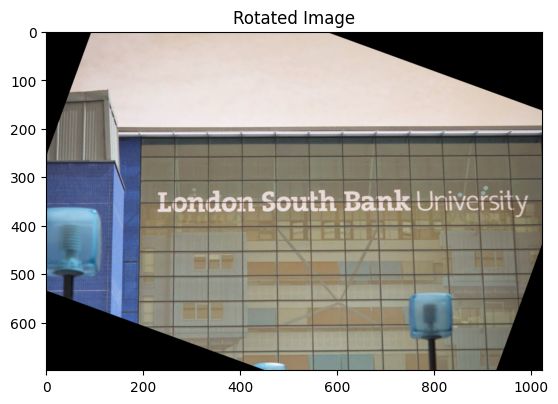

In [ ]:
# please place your solution here:
# Define the center of rotation
center = (image.shape[1] // 2, image.shape[0] // 2)  # Assuming the center of the image

# Define the rotation angle
angle = -20  # Assuming the rotation angle

# Obtain the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# Apply the rotation to the image
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

# Display the rotated image
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()


## 3

Image segmentation: segment the skyline from the building using the function for intra-class variance as used in the Otsu's method for any given `threshold` and input `image`

In [ ]:
# Define a function to calculate intra-class variance using the given threshold
def otv(image, threshold):
    """
    Intra-class variance.
    """
    cls_1 = image >= threshold
    cls_2 = image < threshold

    if np.sum(cls_1) == 0 or np.sum(cls_2) == 0:
        return 0

    mean_1 = np.mean(image[cls_1])
    mean_2 = np.mean(image[cls_2])

    var_1 = np.var(image[cls_1])
    var_2 = np.var(image[cls_2])

    return mean_1 * var_1 + mean_2 * var_2

# Range of threshold values to iterate over
threshold_values = np.arange(0, 200)

# Calculate intra-class variance for each threshold value
variances = [otv(gray_image, threshold) for threshold in threshold_values]

# Find the index of the threshold value with maximum intra-class variance
best_threshold_index = np.argmax(variances)

# Get the best threshold value
best_threshold = threshold_values[best_threshold_index]

# Print the best threshold
print("Best Threshold:", best_threshold)


Best Threshold: 127


Please, show the binary threshold image seprating the image into the two classes based on the `threshold` obtained above:

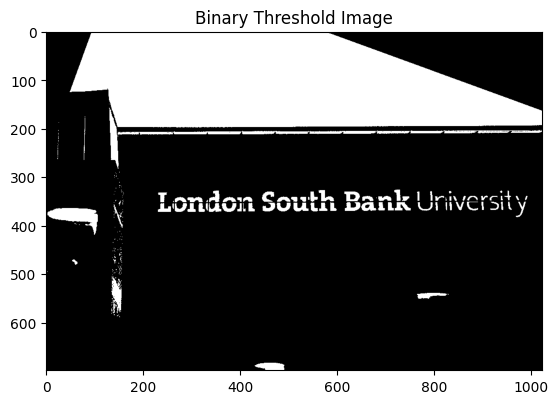

In [ ]:
# Apply the obtained threshold to create binary threshold image
binary_threshold = cv2.threshold(gray_image, 180, 255, cv2.THRESH_BINARY)[1]

# Display the binary threshold image
plt.imshow(binary_threshold, cmap='gray')
plt.title('Binary Threshold Image')
plt.show()


## 4

Improve the segmentation of the building from the sky, using addtional correction for gamma.  You can use the equation below for gamma correction after modfiying the value of the `gamma` parameter.  Show the resulting treshold image.

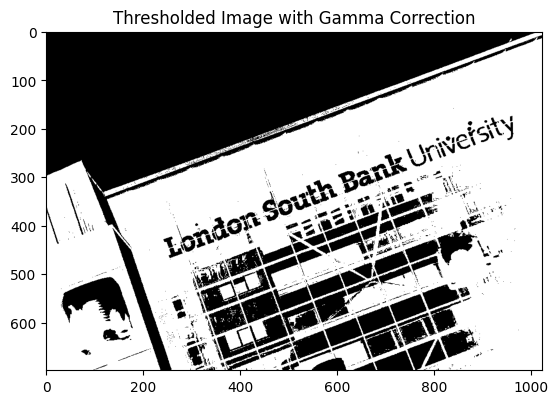

In [ ]:
# Define the desired gamma value
gamma = 0.2

# Apply gamma correction to the image
gamma_corrected = np.array(image.max() * (image / image.max()) ** gamma, dtype=np.uint8)

# Convert the gamma-corrected image to grayscale
gray_gamma_corrected = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to segment the image
_, thresholded = cv2.threshold(gray_gamma_corrected, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Show the resulting threshold image
plt.imshow(thresholded, cmap='binary')
plt.title('Thresholded Image with Gamma Correction')
plt.show()


## 5

Extract the University logo text from the image and make all the fonts of the same thickness, by either dilating some text or eroding the other part of the text.  TIP: use the binarised image from above tasks.  You can use any of the functions/commands below.  Show the resulting image.

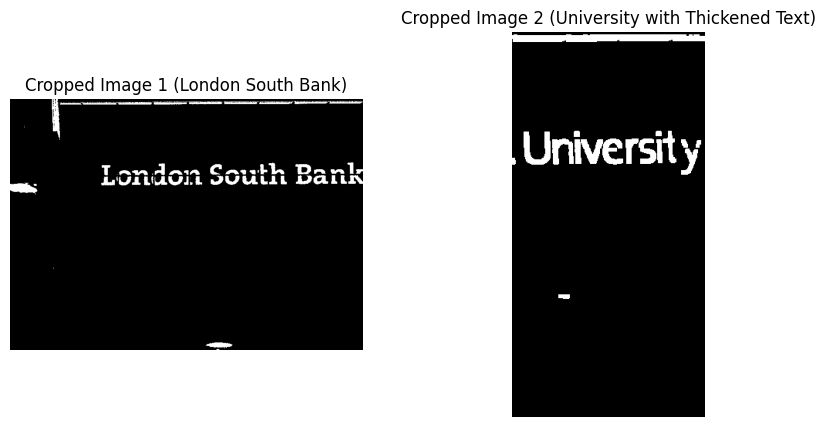

In [ ]:

# Read the original image
image = cv2.imread('LSBU_image.jpg')

# Define the rotation angle
angle = -20

# Get the height and width of the image
(h, w) = image.shape[:2]

# Calculate the center of the image
center = (w // 2, h // 2)

# Define the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# Perform the rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

# Define the coordinates for cropping each half
crop_region_1 = (50, 200, 750, 750)  # Crop region for "London South Bank" text
crop_region_2 = (750, 200, 1000, 750)   # Crop region for "University" text

# Crop the rotated image
cropped_image_1 = rotated_image[crop_region_1[1]:crop_region_1[3], crop_region_1[0]:crop_region_1[2]]
cropped_image_2 = rotated_image[crop_region_2[1]:crop_region_2[3], crop_region_2[0]:crop_region_2[2]]

# Convert both cropped images to grayscale
gray_image_1 = cv2.cvtColor(cropped_image_1, cv2.COLOR_BGR2GRAY)
gray_image_2 = cv2.cvtColor(cropped_image_2, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create binary images
_, binary_image_1 = cv2.threshold(gray_image_1, 200, 255, cv2.THRESH_BINARY)
_, binary_image_2 = cv2.threshold(gray_image_2, 200, 255, cv2.THRESH_BINARY)

# Apply morphological dilation to thicken the text in the second binary image
kernel = np.ones((5, 5), np.uint8)
dilated_image_2 = cv2.dilate(binary_image_2, kernel, iterations=1)

# Display the cropped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image_1, cmap='gray')
plt.title('Cropped Image 1 (London South Bank)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image_2, cmap='gray')
plt.title('Cropped Image 2 (University with Thickened Text)')
plt.axis('off')

plt.show()


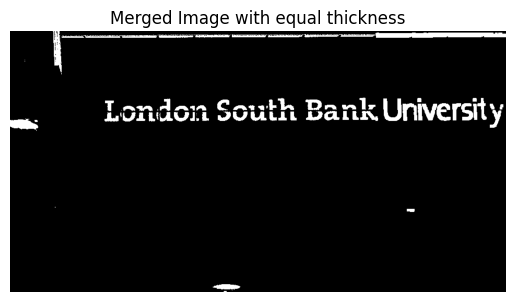

In [ ]:

# Read the original image
image = cv2.imread('LSBU_image.jpg')

# Define the rotation angle
angle = -20

# Get the height and width of the image
(h, w) = image.shape[:2]

# Calculate the center of the image
center = (w // 2, h // 2)

# Define the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# Perform the rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

# Define the coordinates for cropping each half
crop_region_1 = (50, 200, 750, 750)  # Crop region for "London South Bank" text
crop_region_2 = (750, 200, 1000, 750)   # Crop region for "University" text

# Crop the rotated image
cropped_image_1 = rotated_image[crop_region_1[1]:crop_region_1[3], crop_region_1[0]:crop_region_1[2]]
cropped_image_2 = rotated_image[crop_region_2[1]:crop_region_2[3], crop_region_2[0]:crop_region_2[2]]

# Convert both cropped images to grayscale
gray_image_1 = cv2.cvtColor(cropped_image_1, cv2.COLOR_BGR2GRAY)
gray_image_2 = cv2.cvtColor(cropped_image_2, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create binary images
_, binary_image_1 = cv2.threshold(gray_image_1, 200, 255, cv2.THRESH_BINARY)
_, binary_image_2 = cv2.threshold(gray_image_2, 200, 255, cv2.THRESH_BINARY)

# Apply morphological dilation to thicken the text in the second binary image
kernel = np.ones((5, 5), np.uint8)
dilated_image_2 = cv2.dilate(binary_image_2, kernel, iterations=1)

# Resize the second dilated image to match the height of the first image
height_1, width_1 = gray_image_1.shape[:2]
height_2, width_2 = dilated_image_2.shape[:2]
scale_factor = height_1 / height_2
dilated_image_2_resized = cv2.resize(dilated_image_2, (int(width_2 * scale_factor), height_1))

# Convert the first grayscale image to black and white
_, binary_image_1 = cv2.threshold(gray_image_1, 200, 255, cv2.THRESH_BINARY)

# Concatenate the two images horizontally
merged_image = np.concatenate((binary_image_1, dilated_image_2_resized), axis=1)

# Display the merged image
plt.imshow(merged_image, cmap='gray')
plt.title('Merged Image with equal thickness')
plt.axis('off')
plt.show()


## 6

Perform histogramming of the input greyscale image into 64 bins.  You may use the `hist` function, i.e., `plt.hist()`.  You can use the online documentation/help.

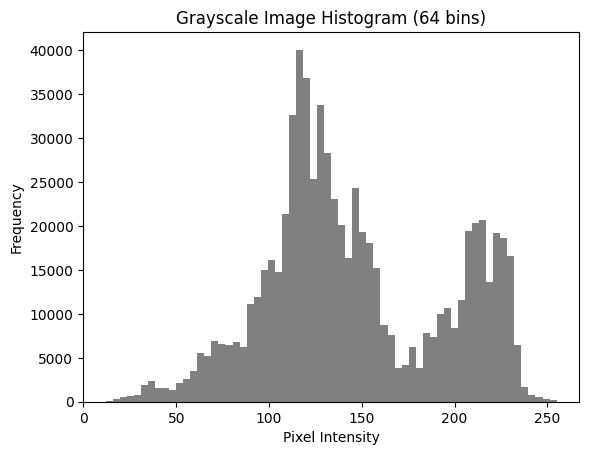

In [ ]:

# Load the input grayscale image
gray_image = cv2.imread('LSBU_image.jpg', cv2.IMREAD_GRAYSCALE)

# Perform histogramming with 64 bins
plt.hist(gray_image.flatten(), bins=64, color='gray')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Grayscale Image Histogram (64 bins)')
plt.show()


Do the same histogramming but for each channel, R, G, and B.  Label them accordingly

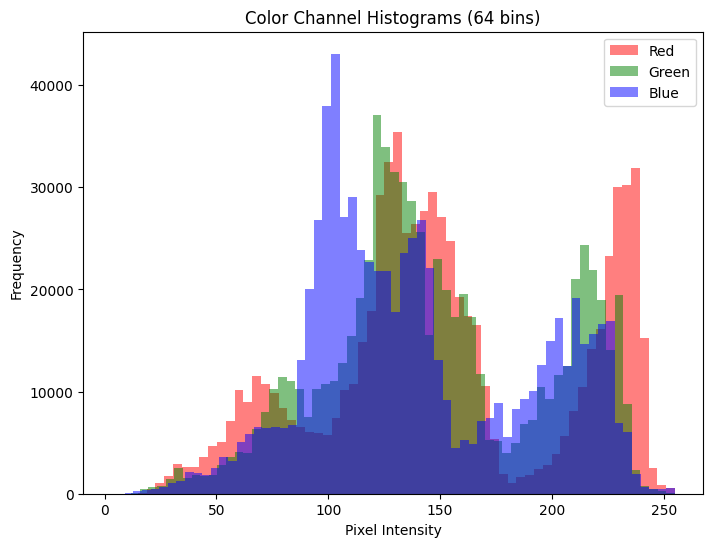

In [ ]:

# Load the input image
image = cv2.imread('LSBU_image.jpg')

# Split the image into its RGB channels
r_channel, g_channel, b_channel = cv2.split(image)

# Perform histogramming for each channel
plt.figure(figsize=(8, 6))

# Red channel
plt.hist(r_channel.flatten(), bins=64, color='red', alpha=0.5, label='Red')

# Green channel
plt.hist(g_channel.flatten(), bins=64, color='green', alpha=0.5, label='Green')

# Blue channel
plt.hist(b_channel.flatten(), bins=64, color='blue', alpha=0.5, label='Blue')

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Color Channel Histograms (64 bins)')
plt.legend()
plt.show()
